<a href="https://colab.research.google.com/github/HoangKhoi1704/Temp/blob/main/AppleStock_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Download th∆∞ vi·ªán ta (Technical Analysis)</h1>
<p>D√πng ƒë·ªÉ x√¢y d·ª±ng chi·∫øn l∆∞·ª£c l∆∞·ª£c giao d·ªãch ƒë·ªãnh l∆∞·ª£ng</p>

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=9169e444aa0296f40b1527141c907d8fde6275d171a8ba4a5c5817f003c8a2ed
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import ta
from ta.momentum import RSIIndicator
from ta.trend import MACD

<h1>C√¢u 1: C√°ch thu th·∫≠p d·ªØ li·ªáu<h1>
<p>d·ªØ li·ªáu l√† m√£ ch·ª©ng kho√°n Apple ƒë∆∞·ª£c l·∫•y t·ª´ th∆∞ vi·ªán tfinance c·ªßa python v√† d√πng gi√° ƒë√≥ng c·ª≠a ƒë·ªÉ ph√¢n t√≠ch v√† x√¢y d·ª±ng c√°c chi·∫øn l∆∞·ª£c</p>

In [ ]:
# T·∫£i d·ªØ li·ªáu c·ªï phi·∫øu Apple t·ª´ 2020 ƒë·∫øn 2024
dt = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
dt.to_csv('AAPL.csv')

df = dt[['Close', 'Volume']].reset_index()
df.columns = ['Date', 'Close', 'Volume']
df.set_index('Date', inplace=True)

# Chuy·ªÉn sang d·ªØ li·ªáu theo tu·∫ßn
df_weekly = df.resample('W').agg({
    'Close': 'last',
    'Volume': 'sum'
})

# Drop rows with NaN values resulting from resampling
df_weekly.dropna(inplace=True)

# Reset the index to make 'Date' a column again
df_weekly.reset_index(inplace=True)
dt = df_weekly
df = dt

df

/tmp/ipython-input-4-549392369.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dt = yf.download('AAPL', start='2020-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Date       Close     Volume
0   2020-01-05   71.914818  281803200
1   2020-01-12   75.033875  670091600
2   2020-01-19   77.064888  652055600
3   2020-01-26   76.963348  463685200
4   2020-02-02   74.835617  866734800
..         ...         ...        ...
257 2024-12-08  242.255600  208286500
258 2024-12-15  247.532883  192702600
259 2024-12-22  253.877594  368202900
260 2024-12-29  254.974930  133685900
261 2025-01-05  251.593094   35557500

[262 rows x 3 columns]

<h1>C√¢u 2: Tr·ª±c quan h√≥a d·ªØ li·ªáu: gi√° ƒë√≥ng c·ª≠a t·ª´ ƒë·∫ßu 2020 ƒë·∫øn cu·ªëi 2024</h1>

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=('Bi·ªÉu ƒë·ªì gi√° ƒë√≥ng c·ª≠a c·ªï phi·∫øu AAPL', 'Bi·ªÉu ƒë·ªì kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªï phi·∫øu AAPL theo tu·∫ßn'),
                    vertical_spacing=0.1)

# Add Close price trace
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price'), row=1, col=1)

# Add Volume trace
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], name='Volume'), row=2, col=1)

# Update layout
fig.update_layout(height=600, title_text='Bi·ªÉu ƒë·ªì gi√° v√† kh·ªëi l∆∞·ª£ng giao d·ªãch c·ªï phi·∫øu AAPL')

fig.show()

<h1>C√¢u 3: Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu</h1>


*   Ki·ªÉm tra xem c√≥ missing value kh√¥ng
*   D√πng Boxplot ƒë·ªÉ x√°c ƒë·ªãnh gi√° tr·ªã ngo·∫°i lai
*   Gi√° trung b√¨nh
*   Gi√° trung v·ªã
*   Gi√° l·ªõn nh·∫•t
*   Gi√° nh·ªè nh·∫•t







In [ ]:
print(df.isnull().sum())

# K·∫øt qu·∫£ cho th·∫•y kh√¥ng c√≥ gi√° tr·ªã n√†o missing

Date      0
Close     0
Volume    0
dtype: int64


In [ ]:
from scipy import stats

def clean_data(dt):
    df = dt.copy()
    df.drop_duplicates(inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df[df['Close'] > 0]
    z_scores = np.abs(stats.zscore(df['Close']))
    df = df[z_scores <= 3]

    df = df[df['Volume'] > 0]
    z_scores = np.abs(stats.zscore(df['Volume']))
    df = df[z_scores <= 3]

    return df

clean_data(dt)

Date       Close     Volume
0   2020-01-05   71.914818  281803200
1   2020-01-12   75.033875  670091600
2   2020-01-19   77.064888  652055600
3   2020-01-26   76.963348  463685200
4   2020-02-02   74.835617  866734800
..         ...         ...        ...
257 2024-12-08  242.255600  208286500
258 2024-12-15  247.532883  192702600
259 2024-12-22  253.877594  368202900
260 2024-12-29  254.974930  133685900
261 2025-01-05  251.593094   35557500

[256 rows x 3 columns]

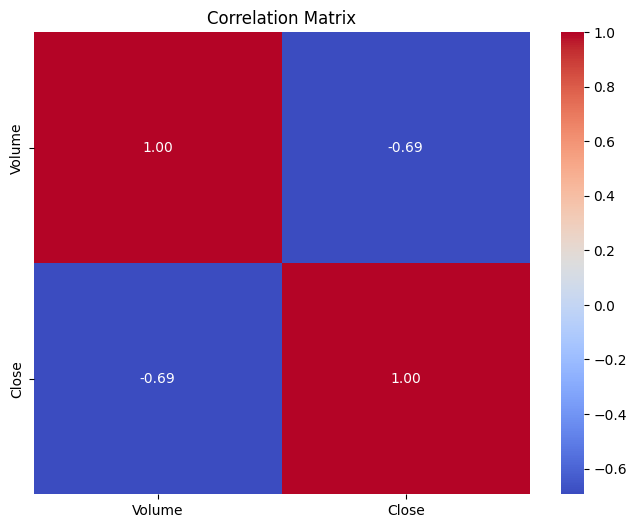

In [ ]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(f"Gi√° tr·ªã trung b√¨nh c·ªßa c·ªï phi·∫øu l√†: {int(df['Close'].mean())} $")
print(f"Gi√° tr·ªã trung v·ªã c·ªßa c·ªï phi·∫øu l√†: {int(df['Close'].median())} $")
print(f"Gi√° tr·ªã l·ªõn nh·∫•t c·ªßa c·ªï phi·∫øu l√†: {int(df['Close'].max())} $")
print(f"Gi√° tr·ªã nh·ªè nh·∫•t c·ªßa c·ªï phi·∫øu l√†: {int(df['Close'].min())} $")

Gi√° tr·ªã trung b√¨nh c·ªßa c·ªï phi·∫øu l√†: 152 $
Gi√° tr·ªã trung v·ªã c·ªßa c·ªï phi·∫øu l√†: 151 $
Gi√° tr·ªã l·ªõn nh·∫•t c·ªßa c·ªï phi·∫øu l√†: 254 $
Gi√° tr·ªã nh·ªè nh·∫•t c·ªßa c·ªï phi·∫øu l√†: 55 $


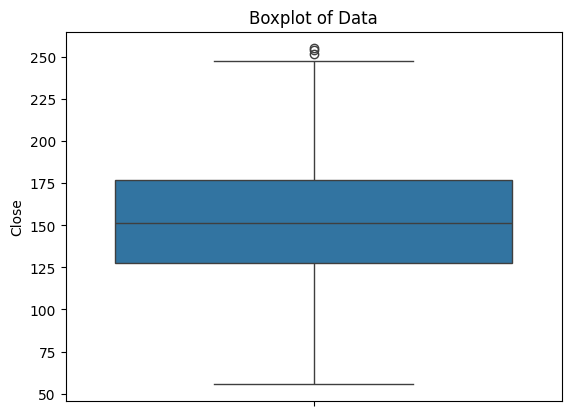

In [ ]:
# Bi·ªÉu ƒë·ªì boxplot ƒë·ªÉ x√°c ƒë·ªãnh c√°c gi√° tr·ªã ngo·∫°i lai
sns.boxplot(data=df['Close'])
plt.title('Boxplot of Data')
plt.show()

<h1>C√¢u 4: X√¢y d·ª±ng 3 chi·∫øn l∆∞·ª£c ƒë·∫ßu t∆∞</h1>

*   SMA
*   MACD
*   Bollinger Band


**<h2>1 Chi·∫øn l∆∞·ª£c SMA (ƒë∆∞·ªùng trung b√¨nh)</h2>**

*   L√† chi·∫øn l∆∞·ª£c d·ª±a tr√™n hai ƒë∆∞·ªùng trung b√¨nh ƒë·ªông (moving averages): m·ªôt ng·∫Øn h·∫°n (7 ng√†y - SMA1 v√¨ ƒë√£ thay ƒë·ªïi theo tu·∫ßn) v√† m·ªôt d√†i h·∫°n (140 ng√†y - SMA20).
*   Khi ƒë∆∞·ªùng MA ng·∫Øn h·∫°n c·∫Øt l√™n ƒë∆∞·ªùng d√†i h·∫°n ‚Üí T√≠n hi·ªáu MUA (Golden Cross).
*   Khi ƒë∆∞·ªùng MA ng·∫Øn h·∫°n c·∫Øt xu·ªëng ƒë∆∞·ªùng d√†i h·∫°n ‚Üí T√≠n hi·ªáu B√ÅN (Death Cross).





/tmp/ipython-input-11-1126144812.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-11-1126144812.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-11-1126144812.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-

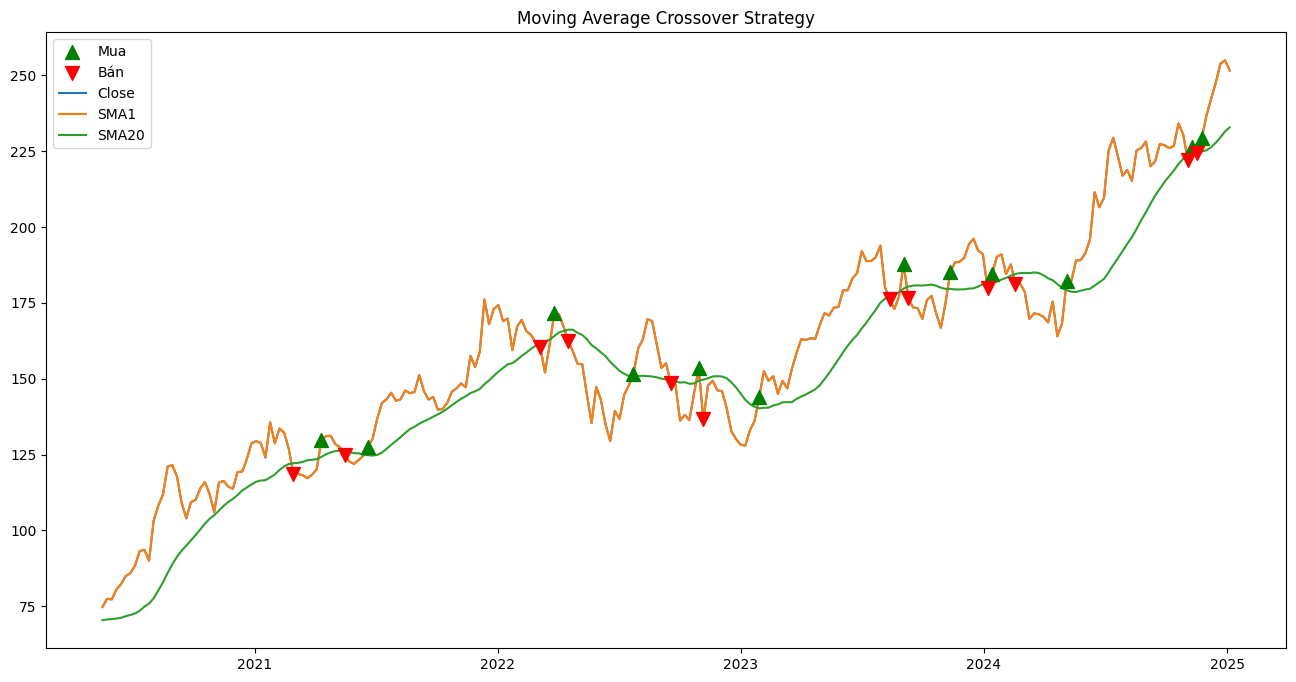

In [ ]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)


df['SMA1'] = df['Close'].rolling(1).mean()
df['SMA20'] = df['Close'].rolling(20).mean()

# T·∫°o t√≠n hi·ªáu giao d·ªãch
df['SMA_Signal'] = 0
df.loc[df['SMA1'] > df['SMA20'], 'SMA_Signal'] = 1
df.loc[df['SMA1'] < df['SMA20'], 'SMA_Signal'] = -1

# T·∫°o c·ªôt v·ªã th·∫ø mua/b√°n (Long only: 1 for Buy, 0 for Hold/Sell)
df['Position'] = df['SMA_Signal'].shift(1)
df['Position'] = df['Position'].replace(-1, 0) # Assuming a long-only strategy

# T√≠nh chi·∫øn l∆∞·ª£c (l·ª£i nhu·∫≠n ti·ªÅm nƒÉng)
df['SMA_Return'] = df['Position'] * df['Close'].pct_change()

data = df[['Date', 'Volume', 'SMA_Return', 'Close', 'SMA1', 'SMA20', 'SMA_Signal', 'Position']].reset_index()

# X√≥a c√°c gi√° tr·ªã NaN
df.dropna(inplace=True)

# X√°c ƒë·ªãnh v·ªã tr√≠ mua/b√°n
df['Buy_Signal'] = (df['SMA1'] > df['SMA20']) & (df['SMA1'].shift(1) <= df['SMA20'].shift(1))
df['Sell_Signal'] = (df['SMA1'] < df['SMA20']) & (df['SMA1'].shift(1) >= df['SMA20'].shift(1))
buy_signals = df[df['Buy_Signal']]
sell_signals = df[df['Sell_Signal']]

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(16, 8))

plt.scatter(buy_signals.Date, buy_signals['Close'], marker='^', color='green', label='Mua', s=100, zorder=10)
plt.scatter(sell_signals.Date, sell_signals['Close'], marker='v', color='red', label='B√°n', s=100, zorder=10)

plt.plot(df.Date, df['Close'], label='Close')
plt.plot(df.Date, df['SMA1'], label='SMA1')
plt.plot(df.Date, df['SMA20'], label='SMA20')

plt.title('Moving Average Crossover Strategy')
plt.legend()
plt.show()

**<h2>2 Chi·∫øn l∆∞·ª£c MACD</h2>**

*   MACD = EMA(2) - EMA(4)
*   ƒê∆∞·ªùng MACD l√† hi·ªáu c·ªßa hai ƒë∆∞·ªùng trung b√¨nh ƒë·ªông l≈©y th·ª´a (EMA)
*  Signal line = EMA(9) c·ªßa MACD
*   Khi MACD c·∫Øt l√™n signal ‚Üí T√≠n hi·ªáu mua
*   Khi MACD c·∫Øt xu·ªëng signal ‚Üí T√≠n hi·ªáu b√°n












/tmp/ipython-input-12-3436273009.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-12-3436273009.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-12-3436273009.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-

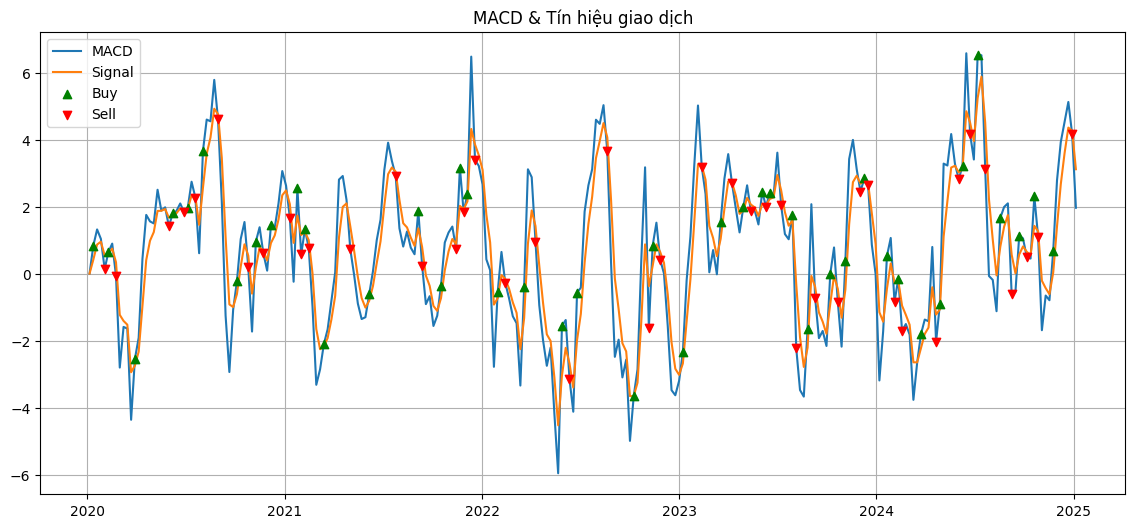

In [ ]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)

# T√≠nh MACD v√† Signal Line
df['EMA12'] = df['Close'].ewm(span=2, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=4, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=3, adjust=False).mean()

# T·∫°o t√≠n hi·ªáu mua/b√°n
df['MACD_Signal'] = 0
df.loc[(df['MACD'] > df['Signal']) & (df['MACD'].shift(1) <= df['Signal'].shift(1)), 'MACD_Signal'] = 1
df.loc[(df['MACD'] < df['Signal']) & (df['MACD'].shift(1) >= df['Signal'].shift(1)), 'MACD_Signal'] = -1

# T√≠nh l·ª£i nhu·∫≠n chi·∫øn l∆∞·ª£c
df['MACD_Return'] = df['MACD_Signal'].shift(1) * df['Close'].pct_change()
# df['Cumulative_MACD'] = (1 + df['MACD_Return']).cumprod()

data = pd.concat([data, df[['MACD_Return', 'EMA12', 'EMA26', 'MACD', 'MACD_Signal']]], axis=1)

# (Tu·ª≥ ch·ªçn) V·∫Ω MACD v·ªõi ƒëi·ªÉm mua/b√°n
buy_signals = df[df['MACD_Signal'] == 1]
sell_signals = df[df['MACD_Signal'] == -1]

plt.figure(figsize=(14,6))
plt.plot(df.Date, df['MACD'], label='MACD')
plt.plot(df.Date, df['Signal'], label='Signal')
plt.scatter(buy_signals.Date, buy_signals['MACD'], label='Buy', marker='^', color='green', zorder=10)
plt.scatter(sell_signals.Date, sell_signals['MACD'], label='Sell', marker='v', color='red', zorder=10)
plt.title('MACD & T√≠n hi·ªáu giao d·ªãch')
plt.legend()
plt.grid(True)
plt.show()


**<h2>3 Chi·∫øn l∆∞·ª£c Bollinger Band (ƒë∆∞·ªùng trung b√¨nh)</h2>**

G·ªìm 3 d·∫£i (bands):
*   D·∫£i gi·ªØa	Trung b√¨nh ƒë·ªông ƒë∆°n gi·∫£n (SMA) trong N phi√™n
*   D·∫£i tr√™n	SMA + k √ó ƒê·ªô l·ªách chu·∫©n (standard deviation)
*   D·∫£i d∆∞·ªõi	SMA - k √ó ƒê·ªô l·ªách chu·∫©n
*   SMA: 10 tu·∫ßn
*   K = 1.5

Di·ªÖn gi·∫£i	√ù nghƒ©a th·ª±c t·∫ø:
*   Gi√° ch·∫°m d·∫£i tr√™n	C√≥ th·ªÉ ƒëang ·ªü v√πng qu√° mua ‚Äì s·∫Øp ƒëi·ªÅu ch·ªânh gi·∫£m
*   Gi√° ch·∫°m d·∫£i d∆∞·ªõi	C√≥ th·ªÉ ƒëang ·ªü v√πng qu√° b√°n ‚Äì c√≥ th·ªÉ ƒë·∫£o chi·ªÅu tƒÉng
*   D·∫£i b√≥ h·∫πp (thu h·∫πp)	Bi·∫øn ƒë·ªông th·∫•p ‚Äì th∆∞·ªùng l√† d·∫•u hi·ªáu s·∫Øp c√≥ bi·∫øn ƒë·ªông m·∫°nh
*   D·∫£i m·ªü r·ªông	Bi·∫øn ƒë·ªông m·∫°nh ‚Äì th·ªã tr∆∞·ªùng ƒëang bi·∫øn ƒë·ªông l·ªõn








/tmp/ipython-input-13-1164659295.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-13-1164659295.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-13-1164659295.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipyth

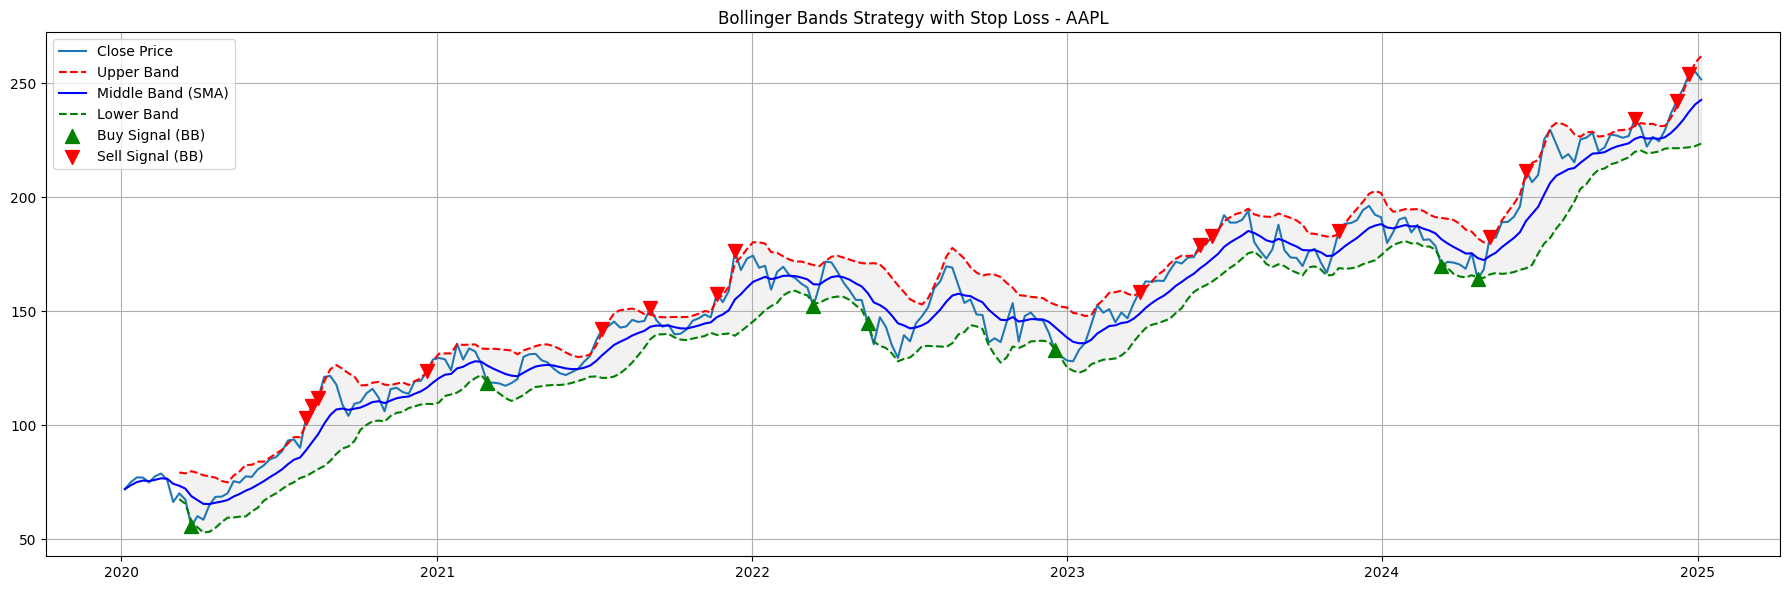

In [ ]:
df = dt[['Date', 'Volume', 'Close']]
df.reset_index(drop=True, inplace=True)

# === C√†i ƒë·∫∑t th√¥ng s·ªë ===
window = 10
multiplier = 1.5
stop_loss_pct = 0.05  # Stop Loss 5%

# === T√≠nh c√°c ch·ªâ b√°o k·ªπ thu·∫≠t ===
df['SMA'] = df['Close'].ewm(span=window).mean()
df['STD'] = df['Close'].rolling(window=window).std()
df['Upper'] = df['SMA'] + multiplier * df['STD']
df['Lower'] = df['SMA'] - multiplier * df['STD']
df['Volume_SMA'] = df['Volume'].rolling(4).mean()
df['SMA_slow'] = df['Close'].rolling(12).mean()

# === T√≠n hi·ªáu giao d·ªãch theo BB, Volume v√† Rule-based ===
df['Signal_BB'] = 0
df.loc[(df['Close'] < df['Lower']) & (df['Volume'] > df['Volume_SMA']) & (df['Close'] < df['SMA_slow']), 'Signal_BB'] = 1
df.loc[(df['Close'] > df['Upper']) & (df['Volume'] > df['Volume_SMA']) & (df['Close'] > df['SMA_slow']), 'Signal_BB'] = -1

# === T√≠nh chi·∫øn l∆∞·ª£c c√≥ Stop Loss ===
df['Position'] = 0
df['Trade_Return'] = 0.0
position = 0
entry_price = 0.0

for i in range(1, len(df)):
    signal = df.loc[df.index[i], 'Signal_BB']
    price = df.loc[df.index[i], 'Close']

    # M·ªü v·ªã th·∫ø m·ªõi n·∫øu ch∆∞a c√≥
    if position == 0:
        if signal == 1:
            position = 1
            entry_price = price
        elif signal == -1:
            position = -1
            entry_price = price

    # N·∫øu ƒëang gi·ªØ v·ªã th·∫ø mua
    elif position == 1:
        if (price < entry_price * (1 - stop_loss_pct)) or signal == -1:
            df.loc[df.index[i], 'Trade_Return'] = (price - entry_price) / entry_price
            position = -1 if signal == -1 else 0
            entry_price = price if signal == -1 else 0.0

    # N·∫øu ƒëang gi·ªØ v·ªã th·∫ø b√°n
    elif position == -1:
        if (price > entry_price * (1 + stop_loss_pct)) or signal == 1:
            df.loc[df.index[i], 'Trade_Return'] = (entry_price - price) / entry_price
            position = 1 if signal == 1 else 0
            entry_price = price if signal == 1 else 0.0

# === C·∫≠p nh·∫≠t DataFrame 'data' v·ªõi c√°c c·ªôt li√™n quan ===
df['BB_Return'] = df['Trade_Return']

if 'BB_Return' in data.columns:
    data = data.drop(columns=['BB_Return'])
data = pd.concat([data, df[['BB_Return', 'Lower', 'Upper', 'Signal_BB']]], axis=1)

# === ƒê·ªì th·ªã chi·∫øn l∆∞·ª£c Bollinger Bands ===
plt.figure(figsize=(18, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['Upper'], label='Upper Band', color='red', linestyle='--')
plt.plot(df['Date'], df['SMA'], label='Middle Band (SMA)', color='blue')
plt.plot(df['Date'], df['Lower'], label='Lower Band', color='green', linestyle='--')
plt.fill_between(df['Date'], df['Upper'], df['Lower'], color='gray', alpha=0.1)

buy_signals_bb = df[df['Signal_BB'] == 1]
sell_signals_bb = df[df['Signal_BB'] == -1]

plt.scatter(buy_signals_bb['Date'], buy_signals_bb['Close'], marker='^', color='green', label='Buy Signal (BB)', s=100, zorder=10)
plt.scatter(sell_signals_bb['Date'], sell_signals_bb['Close'], marker='v', color='red', label='Sell Signal (BB)', s=100, zorder=10)

plt.title("Bollinger Bands Strategy with Stop Loss - AAPL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>C√¢u 5: ƒê√°nh gi√° k·∫øt qu·∫£</h1>


*   D√πng l·ª£i nhu·∫≠n t√≠ch l≈©y ƒë·ªÉ ƒë√°nh gi√° hi·ªáu qu·∫£ c·ªßa c√°c chi·∫øn l∆∞·ª£c. T·ªïng l·ª£i nhu·∫≠n t√≠ch l≈©y ban ƒë·∫ßu l√† 1 t∆∞∆°ng ƒë∆∞∆°ng 100%
  
*   L·ª£i nhu·∫≠n t√≠ch l≈©y bi·ªÉu di·ªÖn t·ªïng ph·∫ßn trƒÉm thay ƒë·ªïi gi√° tr·ªã c·ªßa m·ªôt kho·∫£n ƒë·∫ßu t∆∞ t·ª´ th·ªùi ƒëi·ªÉm b·∫Øt ƒë·∫ßu ƒë·∫øn th·ªùi ƒëi·ªÉm hi·ªán t·∫°i, d·ª±a tr√™n t√≠n hi·ªáu c·ªßa m·ªói chi·∫øn l∆∞·ª£c.
  *   nh·ªè h∆°n 1: l·ª£i nhu·∫≠n √¢m
    *   l·ªõn h∆°n 1: l·ª£i nhu·∫≠n d∆∞∆°ng

*   D√πng c√°c ch·ªâ s·ªë Sharp Ratio, Drawdown ƒë·ªÉ ƒë√°nh gi√° hi·ªáu su·∫•t








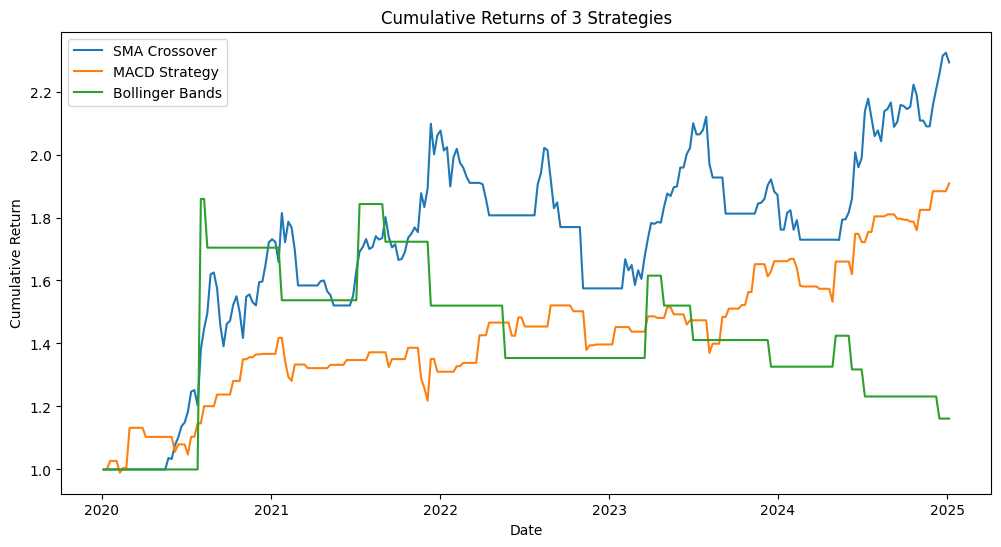

In [ ]:
data[['SMA_Return', 'MACD_Return', 'BB_Return']] = data[['SMA_Return', 'MACD_Return', 'BB_Return']].fillna(0)
data[['Cumulative_SMA', 'Cumulative_MACD', 'Cumulative_BB']] = (1 + data[['SMA_Return', 'MACD_Return', 'BB_Return']]).cumprod()
# V·∫Ω so s√°nh
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Cumulative_SMA'], label='SMA Crossover')
plt.plot(data['Date'], data['Cumulative_MACD'], label='MACD Strategy')
plt.plot(data['Date'], data['Cumulative_BB'], label='Bollinger Bands')
plt.title("Cumulative Returns of 3 Strategies")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

<h1>X√¢y d·ª±ng m√¥ h√¨nh d·ª± b√°o v√† BackTesting</h1>

In [ ]:
data.fillna(0, inplace=True)

data.isnull().sum()

index              0
Date               0
Volume             0
SMA_Return         0
Close              0
SMA1               0
SMA20              0
SMA_Signal         0
Position           0
MACD_Return        0
EMA12              0
EMA26              0
MACD               0
MACD_Signal        0
BB_Return          0
Lower              0
Upper              0
Signal_BB          0
Cumulative_SMA     0
Cumulative_MACD    0
Cumulative_BB      0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

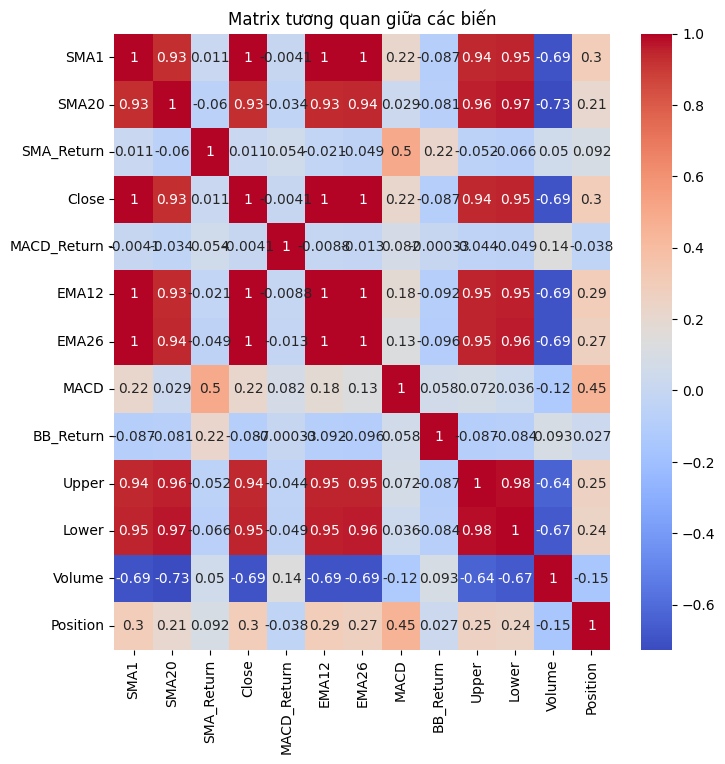

In [ ]:
features = ['SMA1', 'SMA20', 'SMA_Return', 'Close', 'MACD_Return', 'EMA12', 'EMA26', 'MACD', 'BB_Return', 'Upper', 'Lower', 'Volume', 'Position']

corr_matrix = data[features].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrix t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn")
plt.show()

# => b·ªè upper, b·ªè SMA1, Close, Upper

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = ['SMA_Return', 'MACD_Return', 'MACD', 'BB_Return', 'Volume', 'Lower', 'EMA26', 'Position']

# T√≠nh VIF cho t·ª´ng bi·∫øn
X = data[features].dropna()
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
print(vif_data)

# Sau khi x√≥a c√°c bi·∫øn c√≥ ƒë·ªô t∆∞∆°ng quan cao th√¨ c√°c bi·∫øn c√≤n l·∫°i c√≥ ch·ªâ s·ªë vif < 5 n√™n kh√¥ng c·∫ßn ti·∫øp t·ª•c x√≥a

       Feature         VIF
0   SMA_Return    1.489995
1  MACD_Return    1.055503
2         MACD    2.092083
3    BB_Return    1.069324
4       Volume    3.116389
5        Lower  134.821300
6        EMA26  151.018596
7     Position    3.978509


<h1>D√πng GridSearchCV ƒë·ªÉ t√¨m tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh Logistic Regression</h1>

In [ ]:
# G·∫Øn nh√£n tƒÉng/gi·∫£m
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)

data.dropna(subset=features, inplace=True)
data.reset_index(drop=True, inplace=True)

# X√°c ƒë·ªãnh c√°c ƒë·∫∑c tr∆∞ng (features) v√† m·ª•c ti√™u (target)
X = data[features]
y = data['Target']

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Thi·∫øt l·∫≠p t·∫≠p cross-validation theo th·ªùi gian (walk forward)
tscv = TimeSeriesSplit(n_splits=5)

# T·∫°o l∆∞·ªõi tham s·ªë (hyperparameter grid)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # ƒê·ªô ph·∫°t (regularization)
    'penalty': ['l2'],                            # Lo·∫°i regularization (ch·ªâ 'l2' cho solver='lbfgs')
    'solver': ['lbfgs'],                          # Solver hi·ªáu qu·∫£ cho logistic regression
    'max_iter': [500, 1000]                       # ƒê·∫£m b·∫£o h·ªôi t·ª•
}

# T·∫°o m√¥ h√¨nh v√† GridSearch
model = LogisticRegression()
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit d·ªØ li·ªáu
grid_search.fit(X_scaled, y)

best_params = grid_search.best_params_

# In ra k·∫øt qu·∫£ t·ªët nh·∫•t
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


Best parameters: {'C': 0.001, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated score: 0.5581395348837208


In [ ]:
data.fillna(0, inplace=True)

<h1>ƒê∆∞a c√°c tham s·ªë t·ªëi ∆∞u k·∫øt h·ª£p v·ªõi Walk Forward Optimization ƒë·ªÉ ƒë√†o t·∫°o m√¥ h√¨nh d·ª± b√°o v√† so s√°nh k·∫øt qu·∫£ th·ª±c t·∫ø v√† m√¥ h√¨nh</h1>

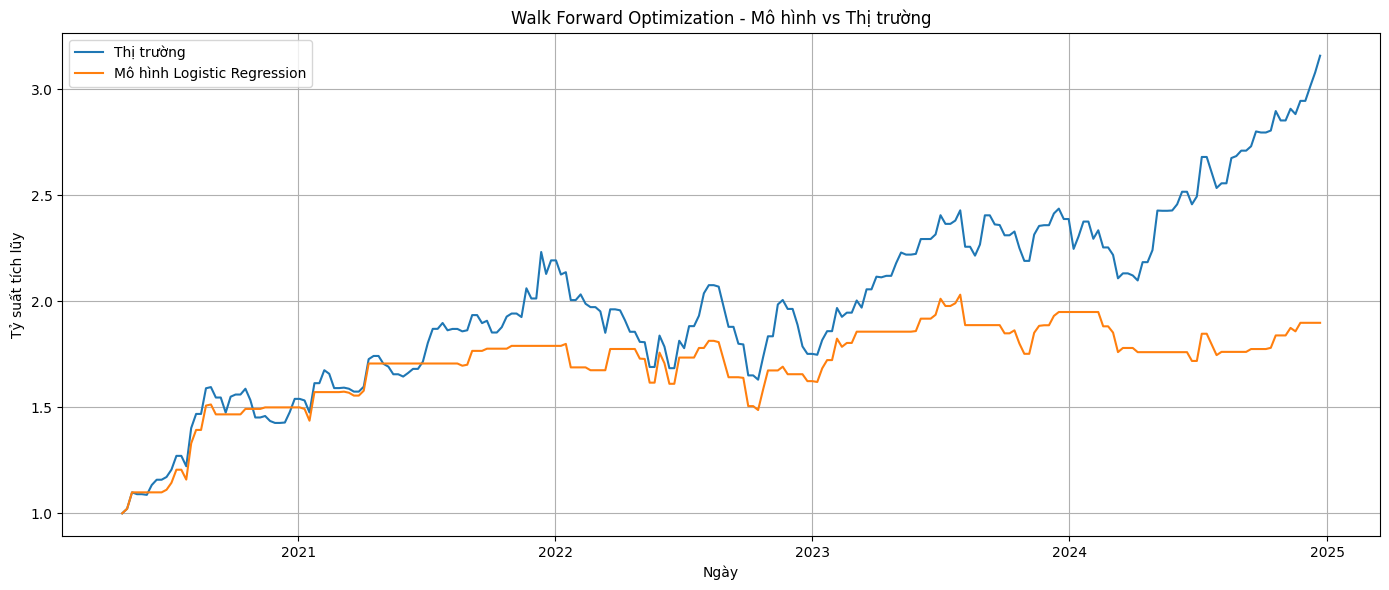

In [ ]:
data.dropna(subset=features + ['Target'], inplace=True)
data.reset_index(drop=True, inplace=True)


# C√†i ƒë·∫∑t th√¥ng s·ªë c·ª≠a s·ªï Walk Forward
window_total = 20      # increased window size for more data in each fold
train_ratio = 0.8
train_size = int(window_total * train_ratio)
test_size = window_total - train_size
step_size = test_size   # di chuy·ªÉn c·ª≠a s·ªï theo m·ªói l·∫ßn test

results = []

# B·∫Øt ƒë·∫ßu Walk Forward Loop
start = 0
while start + window_total <= len(data):
    train = data.iloc[start:start+train_size].copy()
    test = data.iloc[start+train_size:start+window_total].copy()

    # Ki·ªÉm tra xem t·∫≠p hu·∫•n luy·ªán c√≥ ƒë·ªß c·∫£ hai l·ªõp kh√¥ng
    if len(train['Target'].unique()) < 2:
        print(f"Skipping window starting at {data.iloc[start]['Date']} due to single class in training data.")
        start += step_size
        continue


    # Chu·∫©n h√≥a d·ªØ li·ªáu
    # Ensure features exist in the train and test dataframes
    X_train = scaler.fit_transform(train[features])
    X_test = scaler.transform(test[features])

    y_train = train['Target'].values
    y_test = test['Target'].values


    # Hu·∫•n luy·ªán m√¥ h√¨nh
    model = LogisticRegression(
        C=best_params['C'],
        penalty=best_params['penalty'],
        solver=best_params['solver'],
        max_iter=best_params['max_iter'],
        class_weight='balanced' # Add class_weight='balanced'
    )
    model.fit(X_train, y_train)

    # D·ª± ƒëo√°n v√† l∆∞u l·∫°i
    test['Prediction'] = model.predict(X_test)
    test['Prob_Up'] = model.predict_proba(X_test)[:, 1]

    # Calculate Strategy Return and Market Return - ensure 'Close' is available in test
    if 'Close' in test.columns:
        test['Strategy_Return'] = test['Prediction'].shift(1) * test['Close'].pct_change()
        test['Market_Return'] = test['Close'].pct_change()
    else:
        test['Strategy_Return'] = np.nan
        test['Market_Return'] = np.nan
        print(f"Warning: 'Close' column not found in test data for return calculation at window start {test.iloc[0]['Date']}.")


    results.append(test)

    start += step_size

# Ch·ªâ n·ªëi c√°c DataFrame n·∫øu danh s√°ch results kh√¥ng r·ªóng
if results:
    results_df = pd.concat(results)
else:
    results_df = pd.DataFrame() # T·∫°o DataFrame r·ªóng n·∫øu kh√¥ng c√≥ k·∫øt qu·∫£ n√†o

# T·ªïng h·ª£p v√† ƒë√°nh gi√° m√¥ h√¨nh (Ch·ªâ khi results_df kh√¥ng r·ªóng)
if not results_df.empty and 'Close' in results_df.columns: # Ensure 'Close' is in results_df for cumulative returns
    accuracy = accuracy_score(results_df['Target'], results_df['Prediction'])
    precision = precision_score(results_df['Target'], results_df['Prediction'], zero_division=0)
    recall = recall_score(results_df['Target'], results_df['Prediction'], zero_division=0)

    # Bi·ªÉu ƒë·ªì k·∫øt qu·∫£
    results_df['Cumulative_Strategy'] = (1 + results_df['Strategy_Return'].fillna(0)).cumprod()
    results_df['Cumulative_Market'] = (1 + results_df['Market_Return'].fillna(0)).cumprod()

    plt.figure(figsize=(14, 6))
    plt.plot(results_df['Date'], results_df['Cumulative_Market'], label='Th·ªã tr∆∞·ªùng')
    plt.plot(results_df['Date'], results_df['Cumulative_Strategy'], label='M√¥ h√¨nh Logistic Regression')
    plt.title('Walk Forward Optimization - M√¥ h√¨nh vs Th·ªã tr∆∞·ªùng')
    plt.xlabel('Ng√†y')
    plt.ylabel('T·ª∑ su·∫•t t√≠ch l≈©y')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Kh√¥ng c√≥ k·∫øt qu·∫£ n√†o t·ª´ Walk Forward Optimization ho·∫∑c 'Close' column is missing in results_df.")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_strategy(signal_col, return_col, df, strategy_name):
    returns = df[return_col].fillna(0)

    # === Sharpe Ratio ===
    # Ensure there's variation in returns to avoid division by zero
    if returns.std() == 0:
        sharpe_ratio = np.nan
    else:
        sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252)

    # === Max Drawdown ===
    cumulative = (1 + returns).cumprod()
    roll_max = cumulative.cummax()
    drawdown = cumulative / roll_max - 1
    max_drawdown = drawdown.min()

    # === Classification metrics ===
    # D·ª± ƒëo√°n: n·∫øu signal tr∆∞·ªõc ƒë√≥ l√† 1 -> d·ª± ƒëo√°n gi√° tƒÉng
    df = df.copy()
    df['Pred'] = df[signal_col].shift(1)
    df['Actual'] = np.sign(df['Close'].pct_change())

    # Lo·∫°i b·ªè gi√° tr·ªã kh√¥ng h·ª£p l·ªá v√† NaN
    mask = df['Pred'].isin([-1, 1]) & df['Actual'].isin([-1, 1])
    y_true = df.loc[mask, 'Actual']
    y_pred = df.loc[mask, 'Pred']

    # Only calculate classification metrics if there are valid predictions
    if len(y_true) > 0:
        acc = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec = recall_score(y_true, y_pred, zero_division=0)
    else:
        acc = np.nan
        prec = np.nan
        rec = np.nan


    print(f"\n ƒê√ÅNH GI√Å CHI·∫æN L∆Ø·ª¢C: {strategy_name}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f} {'‚úÖ' if sharpe_ratio > 1 else '‚ùå'}") # Sharpe Ratio > 0 is a common benchmark
    print(f"Max Drawdown: {max_drawdown:.2%} {'‚úÖ' if max_drawdown > -0.20 else '‚ùå'}") # Example benchmark for Max Drawdown
    print(f"Accuracy: {acc:.2%} {'‚úÖ' if acc > 0.5 else '‚ùå'}") # Accuracy > 50% is better than random
    print(f"Precision: {prec:.2%} {'‚úÖ' if prec > 0.5 else '‚ùå'}") # Precision > 50% means more correct positive predictions
    print(f"Recall: {rec:.2%} {'‚úÖ' if rec > 0.5 else '‚ùå'}") # Recall > 50% means capturing more actual positive cases
    print("-" * 30)


# G·ªçi h√†m ƒë√°nh gi√° cho t·ª´ng chi·∫øn l∆∞·ª£c
# Using the correct return columns from the 'data' DataFrame
evaluate_strategy('SMA_Signal', 'SMA_Return', data, 'MA Crossover')
# evaluate_strategy('Signal_RSI', 'RSI_Return', data, 'RSI Strategy') # RSI strategy was not implemented
evaluate_strategy('MACD_Signal', 'MACD_Return', data, 'MACD Strategy')
evaluate_strategy('Signal_BB', 'BB_Return', data, 'Bollinger Bands')


 ƒê√ÅNH GI√Å CHI·∫æN L∆Ø·ª¢C: MA Crossover
Sharpe Ratio: 1.98 ‚úÖ
Max Drawdown: -24.93% ‚ùå
Accuracy: 57.44% ‚úÖ
Precision: 60.59% ‚úÖ
Recall: 74.10% ‚úÖ
------------------------------

 ƒê√ÅNH GI√Å CHI·∫æN L∆Ø·ª¢C: MACD Strategy
Sharpe Ratio: 2.02 ‚úÖ
Max Drawdown: -14.06% ‚úÖ
Accuracy: 59.30% ‚úÖ
Precision: 67.44% ‚úÖ
Recall: 58.00% ‚úÖ
------------------------------

 ƒê√ÅNH GI√Å CHI·∫æN L∆Ø·ª¢C: Bollinger Bands
Sharpe Ratio: 0.48 ‚ùå
Max Drawdown: -37.53% ‚ùå
Accuracy: 45.83% ‚ùå
Precision: 71.43% ‚úÖ
Recall: 31.25% ‚ùå
------------------------------


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# T√™n m√¥ h√¨nh
strategy_name_lr = "Logistic Regression Model"

# === Sharpe Ratio ===
returns_lr = results_df['Strategy_Return'].fillna(0)
if returns_lr.std() == 0:
    sharpe_ratio_lr = np.nan
else:
    sharpe_ratio_lr = np.mean(returns_lr) / np.std(returns_lr) * np.sqrt(252)

# === Max Drawdown ===
cumulative_lr = (1 + returns_lr).cumprod()
roll_max_lr = cumulative_lr.cummax()
drawdown_lr = cumulative_lr / roll_max_lr - 1
max_drawdown_lr = drawdown_lr.min()

# === T·ªëi ∆∞u threshold theo x√°c su·∫•t d·ª± ƒëo√°n ===
# Gi·∫£ s·ª≠ k·∫øt qu·∫£ x√°c su·∫•t ƒë∆∞·ª£c l∆∞u trong c·ªôt 'Prob_Up' trong results_df
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0.5
for t in thresholds:
    preds = (results_df['Prob_Up'] >= t).astype(int)
    f1 = f1_score(results_df['Target'], preds, zero_division=0) # Add zero_division=0
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# === D·ª± ƒëo√°n l·∫°i v·ªõi threshold t·ªëi ∆∞u ===
results_df['Prediction_Thresholded'] = (results_df['Prob_Up'] >= best_threshold).astype(int)

# === ƒê√°nh gi√° l·∫°i m√¥ h√¨nh ===
acc_lr = accuracy_score(results_df['Target'], results_df['Prediction_Thresholded'])
prec_lr = precision_score(results_df['Target'], results_df['Prediction_Thresholded'], zero_division=0)
rec_lr = recall_score(results_df['Target'], results_df['Prediction_Thresholded'], zero_division=0)
f1 = f1_score(results_df['Target'], results_df['Prediction_Thresholded'], zero_division=0) # Add zero_division=0

# === In k·∫øt qu·∫£ ===
print(f"\nüìà ƒê√ÅNH GI√Å M√î H√åNH: {strategy_name_lr}")
print(f"üîß Threshold t·ªëi ∆∞u: {best_threshold:.2f}")
print(f"Sharpe Ratio: {sharpe_ratio_lr:.2f} {'‚úÖ' if sharpe_ratio_lr > 1 else '‚ùå'}")
print(f"Max Drawdown: {max_drawdown_lr:.2%} {'‚úÖ' if max_drawdown_lr > -0.20 else '‚ùå'}")
print(f"Accuracy: {acc_lr:.2%} {'‚úÖ' if acc_lr > 0.5 else '‚ùå'}")
print(f"Precision: {prec_lr:.2%} {'‚úÖ' if prec_lr > 0.5 else '‚ùå'}")
print(f"Recall: {rec_lr:.2%} {'‚úÖ' if rec_lr > 0.5 else '‚ùå'}")
print(f"f1-scored: {f1:.2%} {'‚úÖ' if f1 > 0.6 else '‚ùå'}")
print("-" * 30)


üìà ƒê√ÅNH GI√Å M√î H√åNH: Logistic Regression Model
üîß Threshold t·ªëi ∆∞u: 0.49
Sharpe Ratio: 1.89 ‚úÖ
Max Drawdown: -17.99% ‚úÖ
Accuracy: 58.20% ‚úÖ
Precision: 58.09% ‚úÖ
Recall: 99.29% ‚úÖ
f1-scored: 73.30% ‚úÖ
------------------------------


Th·ªëng k√™ m√¥ t·∫£ Strategy_Return:
count    183.000000
mean       0.003898
std        0.028303
min       -0.081301
25%        0.000000
50%        0.000000
75%        0.005015
max        0.147330
Name: Strategy_Return, dtype: float64
Sharpe Ratio: 2.186
Max Drawdown: -17.99%
Win Rate: 21.72%
Cumulative Return: 89.82%


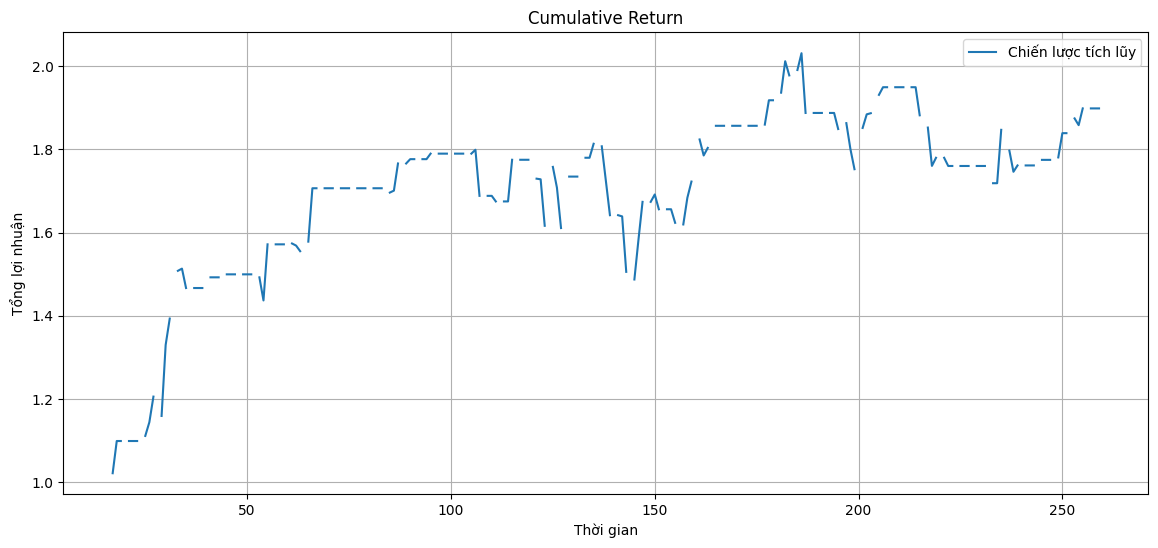

In [ ]:
# 1. M√¥ t·∫£ c∆° b·∫£n
print("Th·ªëng k√™ m√¥ t·∫£ Strategy_Return:")
print(results_df['Strategy_Return'].describe())

# 2. T√≠nh Sharpe Ratio
mean_return = results_df['Strategy_Return'].mean()
std_return = results_df['Strategy_Return'].std()
sharpe_ratio = (mean_return / std_return) * np.sqrt(252)  # n·∫øu d·ªØ li·ªáu l√† daily, sqrt(52) n·∫øu weekly
print(f"Sharpe Ratio: {sharpe_ratio:.3f}")

# 3. Max Drawdown
cum_return = (1 + results_df['Strategy_Return']).cumprod()
running_max = cum_return.cummax()
drawdown = (cum_return - running_max) / running_max
max_drawdown = drawdown.min()
print(f"Max Drawdown: {max_drawdown:.2%}")

# 4. Win rate
results_df['is_win'] = results_df['Strategy_Return'] > 0
win_rate = results_df['is_win'].mean()
print(f"Win Rate: {win_rate:.2%}")

# 5. T·ªïng l·ª£i nhu·∫≠n
total_return = cum_return.iloc[-1] - 1
print(f"Cumulative Return: {total_return:.2%}")

plt.figure(figsize=(14,6))
plt.plot(cum_return, label='Chi·∫øn l∆∞·ª£c t√≠ch l≈©y')
plt.title('Cumulative Return')
plt.xlabel('Th·ªùi gian')
plt.ylabel('T·ªïng l·ª£i nhu·∫≠n')
plt.grid(True)
plt.legend()
plt.show()


üí∏ T·ªïng l·ª£i nhu·∫≠n: 119.39% tr√™n v·ªën ban ƒë·∫ßu $10000
üìÑ Danh s√°ch giao d·ªãch:
 - BUY t·∫°i 2020-08-16 gi√° $111.90
 - SELL t·∫°i 2022-03-13 gi√° $152.06
 - BUY t·∫°i 2022-03-20 gi√° $161.15
 - SELL t·∫°i 2022-04-03 gi√° $171.31
 - BUY t·∫°i 2022-04-10 gi√° $167.16
 - SELL-END t·∫°i 2024-12-22 gi√° $253.88


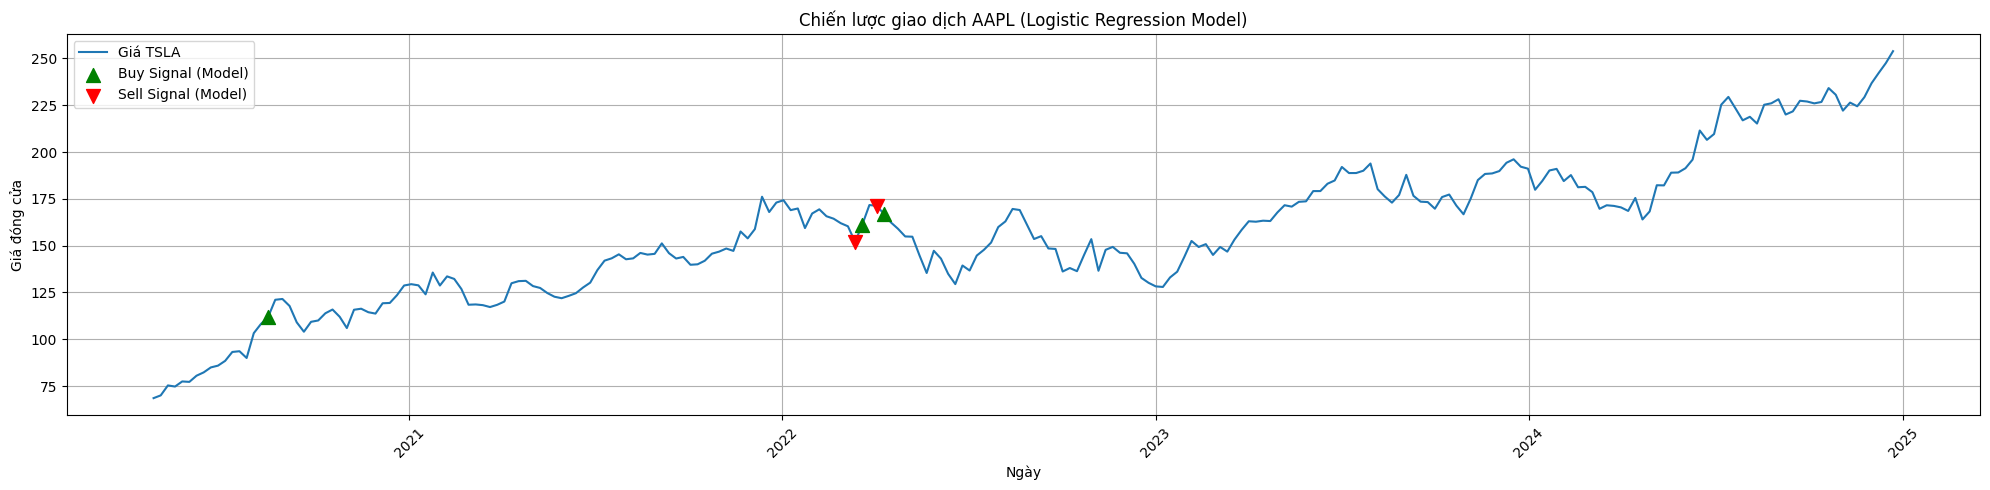

In [ ]:
initial_cash = 10000  # s·ªë v·ªën ban ƒë·∫ßu
cash = initial_cash
position = 0
entry_price = 0

trades = []

# Get buy and sell indices based on the thresholded predictions from results_df
buy_idx = results_df[results_df['Prediction_Thresholded'] == 1].index
sell_idx = results_df[results_df['Prediction_Thresholded'] == 0].index # Assuming 0 means sell/exit position

for i in range(len(results_df)):
    row = results_df.iloc[i]
    current_date = row['Date']
    current_price = row['Close']

    if i in buy_idx and position == 0:
        entry_price = current_price
        position = cash / entry_price  # mua to√†n b·ªô
        cash = 0
        trades.append(('BUY', current_date, entry_price))

    elif i in sell_idx and position > 0:
        exit_price = current_price
        cash = position * exit_price  # b√°n to√†n b·ªô
        position = 0
        trades.append(('SELL', current_date, exit_price))

# N·∫øu c√≤n gi·ªØ c·ªï phi·∫øu ƒë·∫øn cu·ªëi k·ª≥ th√¨ t√≠nh theo gi√° cu·ªëi c√πng
if position > 0:
    final_price = results_df['Close'].iloc[-1]
    cash = position * final_price
    trades.append(('SELL-END', results_df['Date'].iloc[-1], final_price))

total_return = (cash - initial_cash) / initial_cash * 100
print(f"\nüí∏ T·ªïng l·ª£i nhu·∫≠n: {total_return:.2f}% tr√™n v·ªën ban ƒë·∫ßu ${initial_cash}")
print("üìÑ Danh s√°ch giao d·ªãch:")
for action, date, price in trades:
    print(f" - {action} t·∫°i {date.date()} gi√° ${price:.2f}")

# 14. V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(20,5))
plt.plot(results_df['Date'], results_df['Close'], label='Gi√° APPL')

# Plot buy and sell signals from the backtesting
buy_dates = [trade[1] for trade in trades if trade[0] == 'BUY']
buy_prices = [trade[2] for trade in trades if trade[0] == 'BUY']
sell_dates = [trade[1] for trade in trades if trade[0] == 'SELL']
sell_prices = [trade[2] for trade in trades if trade[0] == 'SELL']


plt.scatter(buy_dates, buy_prices, label='Buy Signal (Model)', color='green', marker='^', s=100, zorder=10)
plt.scatter(sell_dates, sell_prices, label='Sell Signal (Model)', color='red', marker='v', s=100, zorder=10)


plt.xlabel("Ng√†y")
plt.ylabel("Gi√° ƒë√≥ng c·ª≠a")
plt.title("Chi·∫øn l∆∞·ª£c giao d·ªãch AAPL (Logistic Regression Model)") # Changed title to AAPL
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()